# Lisbon - project for exam, PRBD, data investigator - Agnieszka Kamińska

## Installing and loading packages

In [ ]:
!pip install shap -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import skew
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

## Getting data

Data for downloading is available here: http://insideairbnb.com/get-the-data

In this notebook I will focus on **Listings data** for **Lisbon**.

**Listings data** is a dataset, that includes information about properties listed on Airbnb. This dataset includes details about :
* location,
* price,
* availability,
* amenities of each property
  and a few more.

# 1.Loading data
  After downloading and extracting, file 'listening.csv' for Lisbon was placed on google drive in the following link:


In [ ]:
data = pd.read_csv('https://drive.google.com/uc?id=14F9s5Gg0zF-JXYaieEB6Skj6LAbUTjyr')

In [ ]:
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,45558745,https://www.airbnb.com/rooms/45558745,20230319041058,2023-03-19,city scrape,FLH Baixa-Chiado Library Loft,The apartment in Lisbon has 1 bedrooms and has...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3953109,...,4.89,4.96,4.68,35073/AL,t,306,300,6,0,1.32
1,33179882,https://www.airbnb.com/rooms/33179882,20230319041058,2023-03-19,city scrape,Palm Guesthouse,A minha propriedade tem uma decoração simples ...,Centro da cidade,https://a0.muscache.com/pictures/478eb0c9-ca8e...,152854735,...,NaN,NaN,NaN,18808/AL,t,5,0,5,0,NaN
2,836176843011037443,https://www.airbnb.com/rooms/836176843011037443,20230319041058,2023-03-19,city scrape,"Lisbon, renewed T1 apartment with pateo near M...","Located in the historic area of Lisbon, next t...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,185689002,...,NaN,NaN,NaN,50802/AL,f,20,15,5,0,NaN
3,1199811,https://www.airbnb.com/rooms/1199811,20230319041058,2023-03-19,city scrape,Best Deal Lisboa Alfama Fado apart.,<b>The space</b><br />Very nice apartment in t...,NaN,https://a0.muscache.com/pictures/21575877/9a88...,6552656,...,4.84,4.85,4.68,46120/AL,t,1,1,0,0,2.31
4,26093410,https://www.airbnb.com/rooms/26093410,20230319041058,2023-03-19,city scrape,Santa Liberdade Flat - Liberdade Avenue at Lisbon,2 steps away from Avenida da Liberdade! <br ...,NaN,https://a0.muscache.com/pictures/0e16f6c5-3d1a...,348308512,...,5.00,5.00,5.00,64304/AL,t,4,4,0,0,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20092,44304902,https://www.airbnb.com/rooms/44304902,20230319041058,2023-03-24,city scrape,Avenida Olaias,"3 min from metro Station Olaias, very close to...",NaN,https://a0.muscache.com/pictures/b6d93e14-800b...,285679616,...,5.00,4.75,4.75,110655/AL,t,2,2,0,0,0.85
20093,23587725,https://www.airbnb.com/rooms/23587725,20230319041058,2023-03-24,city scrape,TERRACE WITH RIVER VIEW *1BD APT*,"Romantic 1 bedroom apartment, well decorated a...","Close to Alfama and Mouraria neighborhoods, yo...",https://a0.muscache.com/pictures/8dc8e828-76c6...,176228709,...,4.91,4.61,4.71,65316/AL,t,1,1,0,0,1.70
20094,19755044,https://www.airbnb.com/rooms/19755044,20230319041058,2023-03-24,city scrape,Flea Market ALFAMA house (PATIO/POOL/AC/GARAGE),The House by Alfama's Flea Market is a duplex ...,The property is located very close to the Alfa...,https://a0.muscache.com/pictures/b602e083-24bc...,105282390,...,4.86,4.46,4.50,45975/AL,f,2,2,0,0,4.26
20095,46078981,https://www.airbnb.com/rooms/46078981,20230319041058,2023-03-24,city scrape,GuestReady - Bright and Modern Apt in Lisbon,"Close to Intendente station, this charming fla...","A neighborhood of contrasts, Arroios stands ou...",https://a0.muscache.com/pictures/prohost-api/H...,402191311,...,2.00,4.00,4.00,Exempt,t,97,89,8,0,0.05


# 2.Data Investigation

In [ ]:
# Print data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20097 entries, 0 to 20096
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20097 non-null  int64  
 1   listing_url                                   20097 non-null  object 
 2   scrape_id                                     20097 non-null  int64  
 3   last_scraped                                  20097 non-null  object 
 4   source                                        20097 non-null  object 
 5   name                                          20088 non-null  object 
 6   description                                   20075 non-null  object 
 7   neighborhood_overview                         12569 non-null  object 
 8   picture_url                                   20097 non-null  object 
 9   host_id                                       20097 non-null 

In [ ]:
data.shape

(20097, 75)

In [ ]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

# 3.Displaying sample of raw data

In [ ]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,45558745,https://www.airbnb.com/rooms/45558745,20230319041058,2023-03-19,city scrape,FLH Baixa-Chiado Library Loft,The apartment in Lisbon has 1 bedrooms and has...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3953109,...,4.89,4.96,4.68,35073/AL,t,306,300,6,0,1.32
1,33179882,https://www.airbnb.com/rooms/33179882,20230319041058,2023-03-19,city scrape,Palm Guesthouse,A minha propriedade tem uma decoração simples ...,Centro da cidade,https://a0.muscache.com/pictures/478eb0c9-ca8e...,152854735,...,NaN,NaN,NaN,18808/AL,t,5,0,5,0,NaN
2,836176843011037443,https://www.airbnb.com/rooms/836176843011037443,20230319041058,2023-03-19,city scrape,"Lisbon, renewed T1 apartment with pateo near M...","Located in the historic area of Lisbon, next t...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,185689002,...,NaN,NaN,NaN,50802/AL,f,20,15,5,0,NaN
3,1199811,https://www.airbnb.com/rooms/1199811,20230319041058,2023-03-19,city scrape,Best Deal Lisboa Alfama Fado apart.,<b>The space</b><br />Very nice apartment in t...,NaN,https://a0.muscache.com/pictures/21575877/9a88...,6552656,...,4.84,4.85,4.68,46120/AL,t,1,1,0,0,2.31
4,26093410,https://www.airbnb.com/rooms/26093410,20230319041058,2023-03-19,city scrape,Santa Liberdade Flat - Liberdade Avenue at Lisbon,2 steps away from Avenida da Liberdade! <br ...,NaN,https://a0.muscache.com/pictures/0e16f6c5-3d1a...,348308512,...,5.00,5.00,5.00,64304/AL,t,4,4,0,0,0.02


##3a.Eliminating unnecessary data

In [ ]:
# Unnecessary data drop
data.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'maximum_minimum_nights','picture_url', 'host_id',	'host_url',	'host_name',	'host_since',	'host_location',	'host_about', 'host_thumbnail_url',	'host_picture_url'	, 'host_neighbourhood', 'host_total_listings_count', 'neighbourhood', 'neighbourhood_cleansed',	'neighbourhood_group_cleansed', 'minimum_maximum_nights',	'maximum_maximum_nights',	'minimum_nights_avg_ntm',	'maximum_nights_avg_ntm',	'calendar_updated',	'has_availability', 'calendar_last_scraped' , 'number_of_reviews' , 'number_of_reviews_ltm', 'first_review',	'last_review' , 'review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	'review_scores_communication', 'review_scores_location'	,'review_scores_value',	'license', 'calculated_host_listings_count_entire_homes',	'calculated_host_listings_count_private_rooms',	'calculated_host_listings_count_shared_rooms'], axis='columns', inplace=True)


In [ ]:
# Data columns after drop
data.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews_l30d', 'review_scores_rating',
       'instant_bookable', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [ ]:
data

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,...,minimum_minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,within an hour,98%,100%,f,530,"['email', 'phone']",t,t,38.710320,-9.138140,...,2,3,10,22,288,1,4.86,t,306,1.32
1,NaN,NaN,NaN,f,5,"['email', 'phone']",t,t,38.699930,-9.421570,...,5,0,0,15,290,0,NaN,t,5,NaN
2,within an hour,91%,98%,f,35,"['email', 'phone']",t,t,38.720987,-9.137193,...,1,12,34,64,262,0,NaN,f,20,NaN
3,within an hour,100%,100%,t,1,"['email', 'phone']",t,t,38.710540,-9.130080,...,1,3,4,11,255,4,4.62,t,1,2.31
4,NaN,NaN,NaN,f,7,"['email', 'phone']",t,t,38.720410,-9.144350,...,3,0,0,0,0,0,5.00,t,4,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20092,within an hour,100%,100%,t,2,"['email', 'phone']",t,t,38.735060,-9.124020,...,18,0,6,24,33,0,5.00,t,2,0.85
20093,within an hour,100%,100%,t,1,"['email', 'phone']",t,t,38.720260,-9.124700,...,2,3,11,27,297,4,4.79,t,1,1.70
20094,NaN,NaN,NaN,f,2,"['email', 'phone']",t,t,38.718730,-9.122120,...,2,0,7,27,92,3,4.59,f,2,4.26
20095,NaN,NaN,NaN,f,792,"['email', 'phone']",t,f,38.722880,-9.140850,...,1,0,0,0,94,0,2.00,t,97,0.05


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20097 entries, 0 to 20096
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              17694 non-null  object 
 1   host_response_rate              17694 non-null  object 
 2   host_acceptance_rate            18654 non-null  object 
 3   host_is_superhost               20078 non-null  object 
 4   host_listings_count             20097 non-null  int64  
 5   host_verifications              20097 non-null  object 
 6   host_has_profile_pic            20097 non-null  object 
 7   host_identity_verified          20097 non-null  object 
 8   latitude                        20097 non-null  float64
 9   longitude                       20097 non-null  float64
 10  property_type                   20097 non-null  object 
 11  room_type                       20097 non-null  object 
 12  accommodates                    

#4.Data Cleansing
- Data types verification, data corrections , changes on data types, data visualization through histograms

In [ ]:
# How many #N/A data we have
na_cols = (data.isna().sum() > 0)
data.loc[:, na_cols].isna().sum().sort_values(ascending=False)

bathrooms               20097
host_response_time       2403
host_response_rate       2403
review_scores_rating     2324
reviews_per_month        2324
host_acceptance_rate     1443
bedrooms                  869
beds                      185
bathrooms_text             29
host_is_superhost          19
dtype: int64

In [ ]:
# Bathrooms - data completion based on bathrooms_text, changing type and data blanks filing
data['bathrooms_text'].unique()

array(['1 bath', '2 shared baths', '2 baths', '1 shared bath',
       '1 private bath', '1.5 baths', '2.5 baths', '1.5 shared baths',
       '3 baths', '4.5 baths', '3 shared baths', '4 baths',
       '2.5 shared baths', nan, '3.5 shared baths', '6.5 baths',
       '3.5 baths', '5 baths', 'Half-bath', '4 shared baths',
       '6.5 shared baths', '10 shared baths', '9 baths', '0 baths',
       '14 baths', '8.5 baths', '6 baths', '18 baths', '6 shared baths',
       '8 shared baths', '5.5 baths', '7 baths', '7.5 baths', '15 baths',
       'Shared half-bath', '9.5 baths', '8 baths', '0 shared baths',
       '5 shared baths', '10 baths', '11 baths', '10.5 baths',
       '4.5 shared baths', '7.5 shared baths', '11.5 baths',
       'Private half-bath', '16.5 baths', '5.5 shared baths', '12 baths'],
      dtype=object)

In [ ]:
data.bathrooms_text.str.split().str[0]

0        1
1        2
2        1
3        2
4        1
        ..
20092    1
20093    1
20094    2
20095    2
20096    2
Name: bathrooms_text, Length: 20097, dtype: object

In [ ]:
data['bathrooms'] = np.where(data['bathrooms_text'].str.contains('half', na=False, case=False),
         0.5,
         data['bathrooms_text'].str.split().str[0]).astype(np.float64)

In [ ]:
data.bathrooms

0        1.0
1        2.0
2        1.0
3        2.0
4        1.0
        ... 
20092    1.0
20093    1.0
20094    2.0
20095    2.0
20096    2.0
Name: bathrooms, Length: 20097, dtype: float64

In [ ]:
data['bathrooms'].unique()

array([ 1. ,  2. ,  1.5,  2.5,  3. ,  4.5,  4. ,  nan,  3.5,  6.5,  5. ,
        0.5, 10. ,  9. ,  0. , 14. ,  8.5,  6. , 18. ,  8. ,  5.5,  7. ,
        7.5, 15. ,  9.5, 11. , 10.5, 11.5, 16.5, 12. ])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20097 entries, 0 to 20096
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              17694 non-null  object 
 1   host_response_rate              17694 non-null  object 
 2   host_acceptance_rate            18654 non-null  object 
 3   host_is_superhost               20078 non-null  object 
 4   host_listings_count             20097 non-null  int64  
 5   host_verifications              20097 non-null  object 
 6   host_has_profile_pic            20097 non-null  object 
 7   host_identity_verified          20097 non-null  object 
 8   latitude                        20097 non-null  float64
 9   longitude                       20097 non-null  float64
 10  property_type                   20097 non-null  object 
 11  room_type                       20097 non-null  object 
 12  accommodates                    

In [ ]:
# How many #N/A data we have now
na_cols = (data.isna().sum() > 0)
data.loc[:, na_cols].isna().sum().sort_values(ascending=False)

host_response_time      2403
host_response_rate      2403
review_scores_rating    2324
reviews_per_month       2324
host_acceptance_rate    1443
bedrooms                 869
beds                     185
bathrooms                 29
bathrooms_text            29
host_is_superhost         19
dtype: int64

In [ ]:
data.drop(['bathrooms_text'], axis='columns', inplace=True)# we can drop 'bathrooms_text' after bathroom data cleansing

<Axes: >

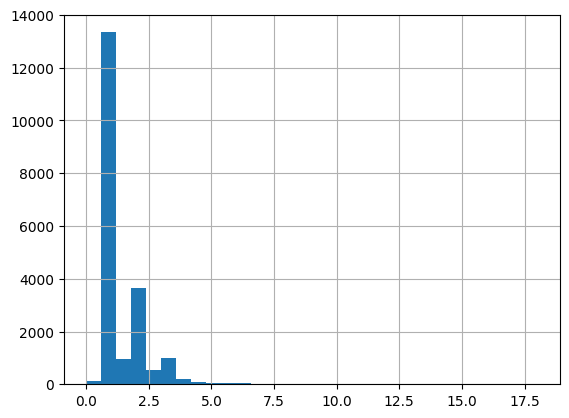

In [ ]:
data.bathrooms.hist(bins=30)

In [ ]:
#nan completion by 'most_frequent' value for bathrooms
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['bathrooms'] = imp.fit_transform(data[['bathrooms']])

In [ ]:
# Host_response_time - no data modifications, we leave nan as they are, it's a categorical value
data['host_response_time'].unique()

array(['within an hour', nan, 'a few days or more', 'within a few hours',
       'within a day'], dtype=object)

In [ ]:
data['host_response_time'] = data['host_response_time'].astype('category') # changing 'host_response_time' to category type

In [ ]:
# Price - data completion based on type changing from object to np.float64 and outliers elimination
data['price'].unique()

array(['$161.00', '$81.00', '$94.00', '$77.00', '$110.00', '$95.00',
       '$144.00', '$500.00', '$65.00', '$78.00', '$111.00', '$60.00',
       '$44.00', '$99.00', '$63.00', '$70.00', '$35.00', '$84.00',
       '$75.00', '$219.00', '$113.00', '$30.00', '$89.00', '$59.00',
       '$90.00', '$76.00', '$220.00', '$124.00', '$253.00', '$145.00',
       '$80.00', '$179.00', '$154.00', '$52.00', '$64.00', '$190.00',
       '$69.00', '$29.00', '$416.00', '$37.00', '$55.00', '$50.00',
       '$68.00', '$85.00', '$252.00', '$306.00', '$454.00', '$54.00',
       '$5,879.00', '$98.00', '$48.00', '$49.00', '$215.00', '$133.00',
       '$45.00', '$186.00', '$250.00', '$200.00', '$150.00', '$120.00',
       '$26.00', '$251.00', '$351.00', '$350.00', '$142.00', '$105.00',
       '$96.00', '$205.00', '$180.00', '$374.00', '$28.00', '$100.00',
       '$140.00', '$104.00', '$66.00', '$480.00', '$101.00', '$103.00',
       '$25.00', '$130.00', '$62.00', '$73.00', '$34.00', '$234.00',
       '$82.00', '

In [ ]:
data.rename(columns={'price': 'price_text'}, inplace=True)

In [ ]:
data['price'] = data['price_text'].str.replace('[$,]', '', regex=True).astype(np.float64)

In [ ]:
data['price'].unique()

array([1.6100e+02, 8.1000e+01, 9.4000e+01, 7.7000e+01, 1.1000e+02,
       9.5000e+01, 1.4400e+02, 5.0000e+02, 6.5000e+01, 7.8000e+01,
       1.1100e+02, 6.0000e+01, 4.4000e+01, 9.9000e+01, 6.3000e+01,
       7.0000e+01, 3.5000e+01, 8.4000e+01, 7.5000e+01, 2.1900e+02,
       1.1300e+02, 3.0000e+01, 8.9000e+01, 5.9000e+01, 9.0000e+01,
       7.6000e+01, 2.2000e+02, 1.2400e+02, 2.5300e+02, 1.4500e+02,
       8.0000e+01, 1.7900e+02, 1.5400e+02, 5.2000e+01, 6.4000e+01,
       1.9000e+02, 6.9000e+01, 2.9000e+01, 4.1600e+02, 3.7000e+01,
       5.5000e+01, 5.0000e+01, 6.8000e+01, 8.5000e+01, 2.5200e+02,
       3.0600e+02, 4.5400e+02, 5.4000e+01, 5.8790e+03, 9.8000e+01,
       4.8000e+01, 4.9000e+01, 2.1500e+02, 1.3300e+02, 4.5000e+01,
       1.8600e+02, 2.5000e+02, 2.0000e+02, 1.5000e+02, 1.2000e+02,
       2.6000e+01, 2.5100e+02, 3.5100e+02, 3.5000e+02, 1.4200e+02,
       1.0500e+02, 9.6000e+01, 2.0500e+02, 1.8000e+02, 3.7400e+02,
       2.8000e+01, 1.0000e+02, 1.4000e+02, 1.0400e+02, 6.6000e

In [ ]:
#data.drop(['price_text'], axis='columns', inplace=True)# we can drop 'price_text' after price data cleansing

In [ ]:
# Let's eliminate outliers from price, let's display main values from the column 'price'
data.price.describe()

count    20097.000000
mean       139.684082
std        874.040097
min          0.000000
25%         63.000000
50%         90.000000
75%        136.000000
max      90400.000000
Name: price, dtype: float64

In [ ]:
# Let's cut-off from data 'price' values higher than $10000 per night
too_high = data[data['price']>10000].index
data = data.drop(too_high, axis=0)

<Axes: >

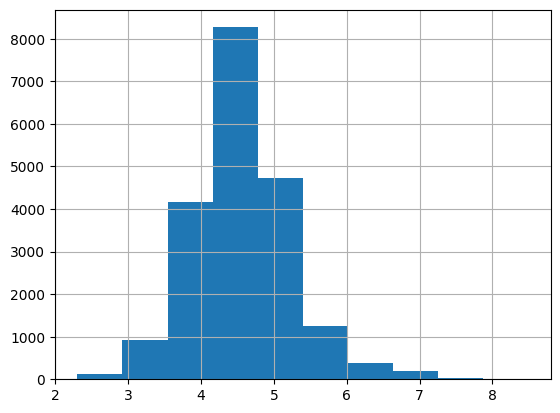

In [ ]:
# Should we consider outliers exclusion and logarithm transformation?
data.query('price > 5 & price < 5000').price.apply(np.log).hist()

In [ ]:
data.price.skew() # we can observe , that more skeweness is on the right side and from there we can start to eliminate outliers

20.224602317061684

99% properties have a price lower than  840.70
99% properties have a price higher than  20.00
After 99% properties have a price lower than  685.00
After 99% properties have a price higher than  23.00


<Axes: >

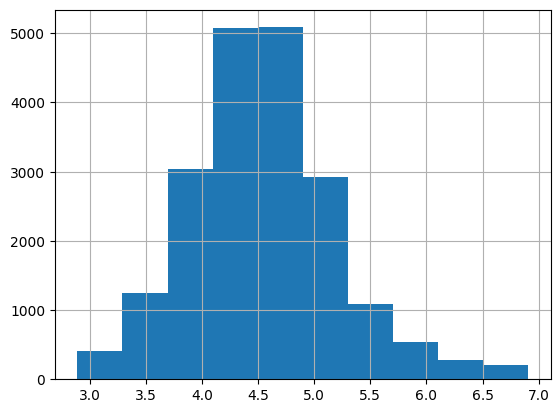

In [ ]:
print("99% properties have a price lower than {0: .2f}".format(np.percentile(data.price, 99)))
print("99% properties have a price higher than {0: .2f}".format(np.percentile(data.price, 1)))
data = data[(data.price <= np.percentile(data.price, 99.5)) & (data.price > 0)]
data = data[(data.price >= np.percentile(data.price, 0.5)) & (data.price > 0)]
print("After 99% properties have a price lower than {0: .2f}".format(np.percentile(data.price, 99)))
print("After 99% properties have a price higher than {0: .2f}".format(np.percentile(data.price, 1)))
data.query('price > 5 & price < 5000').price.apply(np.log).hist()

In [ ]:
data.price.skew() # skeweness after removing outliers improved and is closer to the centerline !

4.070354215811506

In [ ]:
# Changing object type for 'host_response_rate' to float64
data['host_response_rate'].unique()

array(['98%', nan, '91%', '100%', '97%', '93%', '90%', '99%', '33%',
       '66%', '0%', '44%', '92%', '69%', '60%', '95%', '94%', '75%',
       '42%', '88%', '13%', '71%', '83%', '96%', '73%', '63%', '50%',
       '82%', '81%', '67%', '77%', '4%', '87%', '80%', '78%', '79%',
       '41%', '86%', '85%', '70%', '25%', '40%', '17%', '89%', '30%',
       '38%', '53%', '14%', '84%', '74%', '65%', '29%', '20%', '56%',
       '57%', '43%', '64%'], dtype=object)

In [ ]:
# Changing object type for 'host_response_rate' to float64
data.host_response_rate = data.host_response_rate.str.replace('%', '').astype(np.float64)/100

In [ ]:
data['host_response_rate'].unique()

array([0.98,  nan, 0.91, 1.  , 0.97, 0.93, 0.9 , 0.99, 0.33, 0.66, 0.  ,
       0.44, 0.92, 0.69, 0.6 , 0.95, 0.94, 0.75, 0.42, 0.88, 0.13, 0.71,
       0.83, 0.96, 0.73, 0.63, 0.5 , 0.82, 0.81, 0.67, 0.77, 0.04, 0.87,
       0.8 , 0.78, 0.79, 0.41, 0.86, 0.85, 0.7 , 0.25, 0.4 , 0.17, 0.89,
       0.3 , 0.38, 0.53, 0.14, 0.84, 0.74, 0.65, 0.29, 0.2 , 0.56, 0.57,
       0.43, 0.64])

<Axes: >

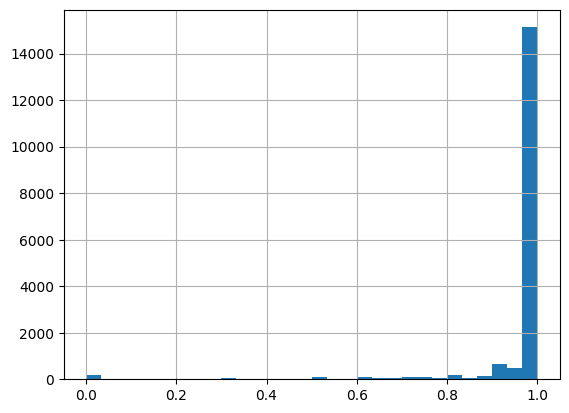

In [ ]:
data.host_response_rate.hist(bins=30) # based on the histogram, blank values will be changed to the 'most frequent' values

In [ ]:
data.host_response_rate.skew() # low skeweness

-5.464423499604262

In [ ]:
data.host_response_rate.isna().sum()

2359

In [ ]:
#nan completion by 'most_frequent' value
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['host_response_rate'] = imp.fit_transform(data[['host_response_rate']])

<Axes: >

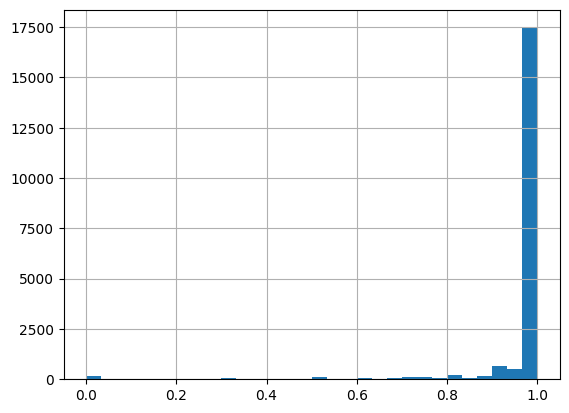

In [ ]:
data.host_response_rate.hist(bins=30) # histogram after blank completion by 'most frequent'

In [ ]:
# Changing object type for 'host_acceptance_rate' to float64
data['host_acceptance_rate'].unique()

array(['100%', nan, '98%', '99%', '92%', '97%', '95%', '65%', '84%',
       '94%', '96%', '80%', '77%', '25%', '68%', '50%', '57%', '63%',
       '82%', '90%', '60%', '79%', '0%', '85%', '88%', '75%', '89%',
       '59%', '83%', '46%', '39%', '87%', '9%', '67%', '93%', '78%',
       '66%', '74%', '73%', '51%', '31%', '91%', '17%', '54%', '41%',
       '49%', '86%', '76%', '44%', '64%', '69%', '72%', '70%', '23%',
       '29%', '81%', '7%', '71%', '33%', '20%', '62%', '53%', '55%',
       '43%', '42%', '48%', '47%', '52%', '40%', '30%', '13%', '58%',
       '15%', '21%', '38%', '26%', '18%', '56%', '36%', '12%', '3%', '5%',
       '61%', '2%', '14%', '27%', '19%', '45%', '35%', '10%', '8%', '4%',
       '28%', '24%', '32%'], dtype=object)

In [ ]:
data.host_acceptance_rate = data.host_acceptance_rate.str.replace('%', '').astype(np.float64)/100

In [ ]:
data.host_acceptance_rate.unique()

array([1.  ,  nan, 0.98, 0.99, 0.92, 0.97, 0.95, 0.65, 0.84, 0.94, 0.96,
       0.8 , 0.77, 0.25, 0.68, 0.5 , 0.57, 0.63, 0.82, 0.9 , 0.6 , 0.79,
       0.  , 0.85, 0.88, 0.75, 0.89, 0.59, 0.83, 0.46, 0.39, 0.87, 0.09,
       0.67, 0.93, 0.78, 0.66, 0.74, 0.73, 0.51, 0.31, 0.91, 0.17, 0.54,
       0.41, 0.49, 0.86, 0.76, 0.44, 0.64, 0.69, 0.72, 0.7 , 0.23, 0.29,
       0.81, 0.07, 0.71, 0.33, 0.2 , 0.62, 0.53, 0.55, 0.43, 0.42, 0.48,
       0.47, 0.52, 0.4 , 0.3 , 0.13, 0.58, 0.15, 0.21, 0.38, 0.26, 0.18,
       0.56, 0.36, 0.12, 0.03, 0.05, 0.61, 0.02, 0.14, 0.27, 0.19, 0.45,
       0.35, 0.1 , 0.08, 0.04, 0.28, 0.24, 0.32])

<Axes: >

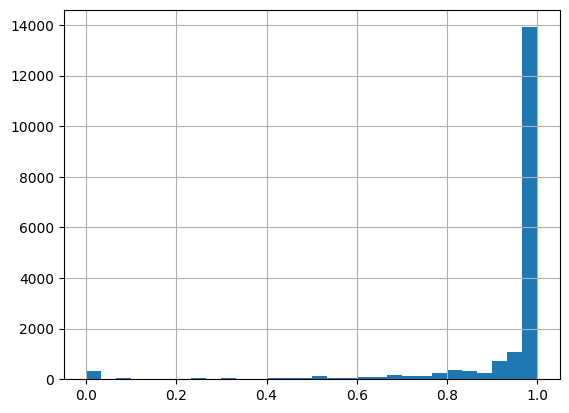

In [ ]:
data.host_acceptance_rate.hist(bins=30) # based on the histogram, blank values will be changed to the 'most frequent' values

In [ ]:
data.host_acceptance_rate.skew() # low skeweness, more on the left side

-3.7138056238859

In [ ]:
data.host_acceptance_rate.isna().sum()

1413

In [ ]:
#nan completion by 'most_frequent' value
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['host_acceptance_rate'] = imp.fit_transform(data[['host_acceptance_rate']])

<Axes: >

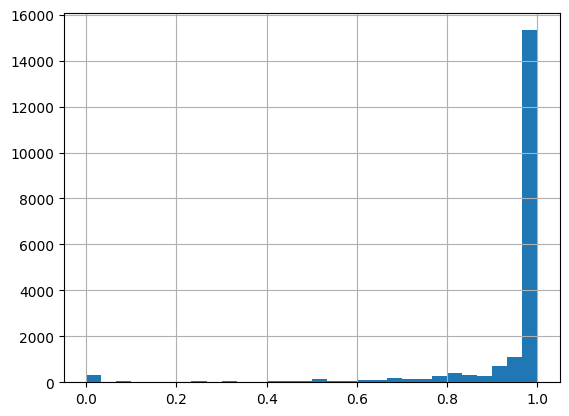

In [ ]:
data.host_acceptance_rate.hist(bins=30) # histogram after blank completion by 'most frequent'

In [ ]:
data.host_acceptance_rate.dtype

dtype('float64')

In [ ]:
data.host_is_superhost.unique() # - changing f and t string to True and False, no data modifications, we leave nan as they are, data is a categorical value

array(['f', 't', nan], dtype=object)

In [ ]:
data.host_is_superhost.map({'t': True, 'f': False}).unique()

array([False, True, nan], dtype=object)

In [ ]:
data['review_scores_rating'].unique()

array([4.86,  nan, 4.62, 5.  , 4.5 , 4.95, 4.76, 4.31, 4.66, 4.61, 3.25,
       4.64, 4.43, 4.45, 4.6 , 4.98, 4.58, 4.79, 4.84, 4.63, 4.91, 4.15,
       4.19, 4.77, 4.92, 4.8 , 4.33, 4.73, 4.93, 4.67, 4.71, 3.8 , 4.29,
       4.88, 4.32, 4.78, 4.85, 4.  , 4.59, 3.55, 4.25, 4.27, 4.68, 1.67,
       4.75, 4.4 , 4.41, 4.36, 4.72, 4.17, 4.81, 4.34, 4.56, 4.3 , 4.83,
       4.89, 4.07, 4.52, 4.44, 4.82, 4.7 , 4.04, 3.6 , 4.12, 4.94, 3.  ,
       4.87, 4.49, 4.21, 4.37, 4.46, 4.74, 4.57, 4.09, 4.96, 4.9 , 4.48,
       3.67, 4.55, 4.54, 4.2 , 4.69, 4.24, 3.71, 4.38, 4.65, 3.33, 4.06,
       4.35, 4.22, 3.5 , 4.53, 4.28, 4.14, 4.26, 4.18, 2.89, 3.46, 4.16,
       4.47, 1.  , 4.1 , 4.05, 4.42, 3.57, 3.87, 4.97, 4.51, 3.62, 0.  ,
       3.9 , 4.99, 3.76, 3.61, 3.88, 3.27, 4.02, 4.23, 3.4 , 4.39, 2.  ,
       3.94, 3.56, 4.03, 3.82, 2.8 , 3.44, 3.7 , 3.97, 3.96, 3.59, 2.75,
       3.83, 3.65, 4.13, 3.75, 2.42, 3.79, 3.85, 4.11, 3.98, 3.58, 3.73,
       2.93, 4.08, 3.1 , 3.93, 3.86, 3.43, 3.91, 3.

<Axes: >

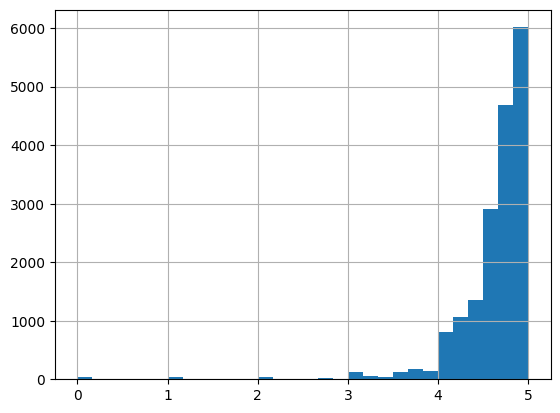

In [ ]:
data.review_scores_rating.hist(bins=30) # based on histogram blank completion will be done by 'median'

In [ ]:
data.review_scores_rating.skew() # low skeweness, more on the left side

-4.345710524533878

In [ ]:
data.review_scores_rating.isna().sum()

2274

In [ ]:
#nan completion by 'median' value
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data['review_scores_rating'] = imp.fit_transform(data[['review_scores_rating']])

<Axes: >

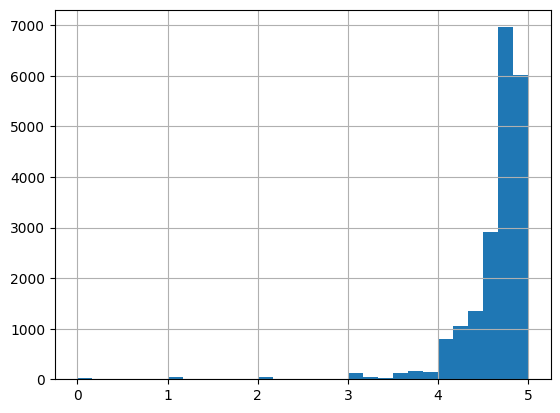

In [ ]:
data.review_scores_rating.hist(bins=30) # after blank completion

In [ ]:
data.review_scores_rating.skew()

-4.657118462386708

In [ ]:
data['reviews_per_month'].unique()

array([1.320e+00,       nan, 2.310e+00, 2.000e-02, 4.000e-02, 4.250e+00,
       1.000e+00, 3.210e+00, 3.610e+00, 3.630e+00, 1.610e+00, 2.040e+00,
       1.590e+00, 5.300e-01, 1.350e+00, 1.920e+00, 1.690e+00, 1.730e+00,
       6.670e+00, 2.670e+00, 1.860e+00, 3.920e+00, 9.300e-01, 1.430e+00,
       3.500e-01, 1.800e-01, 1.110e+00, 3.040e+00, 8.100e-01, 3.450e+00,
       1.200e-01, 2.000e-01, 2.250e+00, 3.370e+00, 1.440e+00, 2.400e-01,
       1.190e+00, 2.220e+00, 8.800e-01, 2.130e+00, 7.200e-01, 4.900e-01,
       1.570e+00, 2.900e-01, 8.000e-02, 1.500e-01, 1.020e+00, 3.700e-01,
       1.280e+00, 5.000e-02, 1.030e+00, 1.270e+00, 1.770e+00, 6.700e-01,
       1.630e+00, 6.500e-01, 5.500e-01, 2.540e+00, 2.940e+00, 8.200e-01,
       9.000e-02, 6.000e-02, 1.310e+00, 7.600e-01, 9.900e-01, 2.700e-01,
       2.370e+00, 1.010e+00, 3.800e-01, 9.200e-01, 1.300e+00, 1.000e-01,
       5.420e+00, 6.900e-01, 1.200e+00, 2.600e-01, 4.300e-01, 6.200e-01,
       5.600e-01, 3.100e-01, 8.400e-01, 4.200e-01, 

<Axes: >

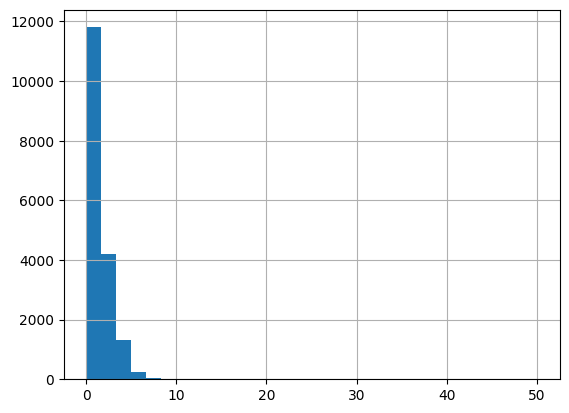

In [ ]:
data.reviews_per_month.hist(bins=30) # based on histogram blank completion will be done by 'most_frequent'

In [ ]:
data.reviews_per_month.skew() # low skeweness, more on the right side

4.39618239523317

In [ ]:
data.reviews_per_month.isna().sum()

2274

In [ ]:
#nan completion by 'most_frequent' value
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['reviews_per_month'] = imp.fit_transform(data[['reviews_per_month']])

<Axes: >

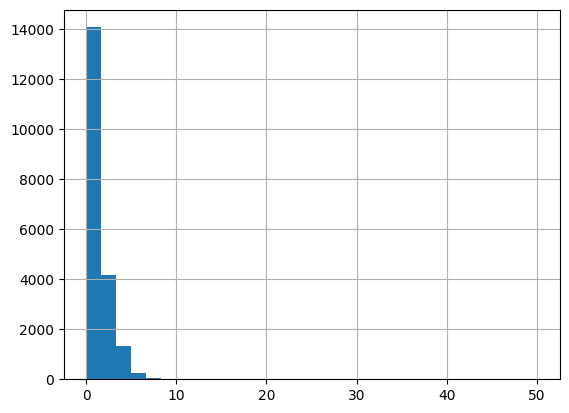

In [ ]:
data.reviews_per_month.hist(bins=30) # after blank completion

In [ ]:
data['bedrooms'].unique()

array([ 1.,  3.,  2.,  4., nan,  7.,  5., 22.,  6.,  9.,  8., 14., 10.,
       11., 12., 19.])

In [ ]:
data.bedrooms.isna().sum()

862

<Axes: >

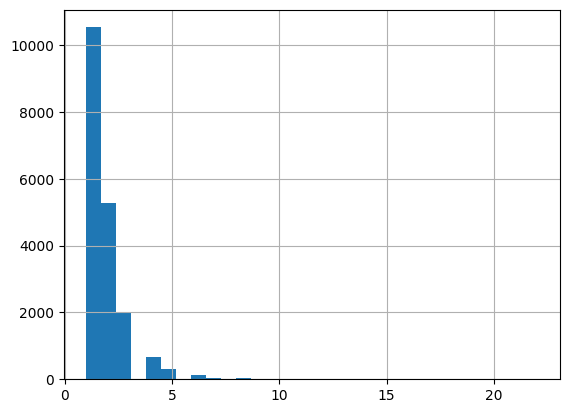

In [ ]:
data.bedrooms.hist(bins=30) #

In [ ]:
data.bedrooms.skew() # low skeweness, more on the right side

2.891361832982977

In [ ]:
#nan completion by 'most_frequent' value
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['bedrooms'] = imp.fit_transform(data[['bedrooms']])

<Axes: >

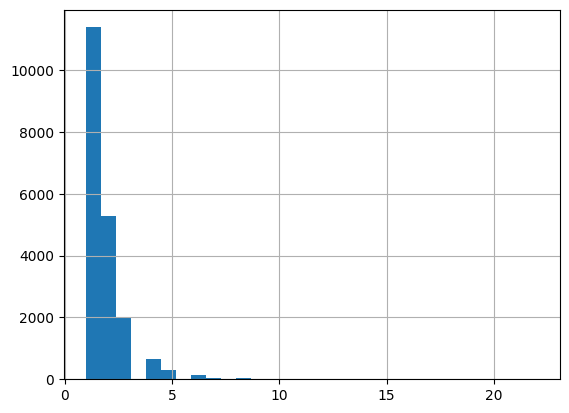

In [ ]:
data.bedrooms.hist(bins=30) #after blanks filling

In [ ]:
data.beds.unique()

array([ 2.,  4.,  1.,  3.,  8.,  5., 10., 11.,  6., 16., nan,  7., 12.,
        9., 15., 13., 14., 17., 23., 19., 35., 20., 18., 30., 25., 22.,
       24., 36., 21.])

<Axes: >

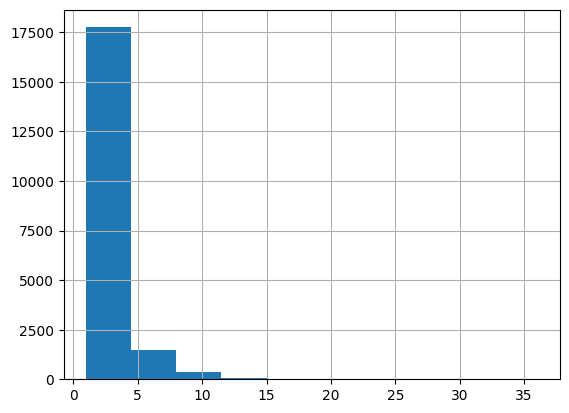

In [ ]:
data.beds.hist(bins=10)

In [ ]:
data.beds.skew() # low skeweness, more on the right side

3.483252305678382

In [ ]:
data.beds.isna().sum()

180

In [ ]:
#nan completion by 'most_frequent' value
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['beds'] = imp.fit_transform(data[['beds']])

In [ ]:
# Distance from City Center calculations
import math
data['distance_from_center'] = data.apply(lambda row: math.sqrt((row['longitude'])**2 + (row['latitude'])**2), axis=1)

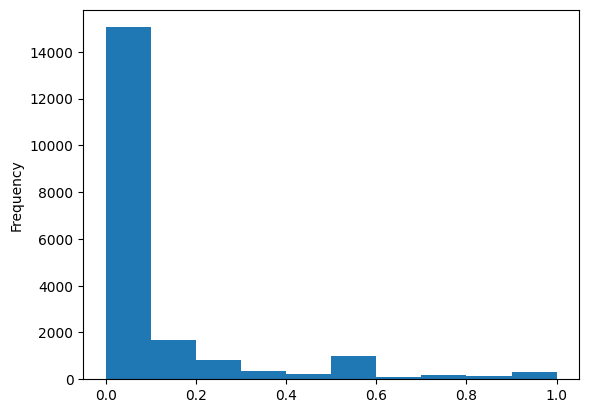

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['normalized_distance_from_center'] = scaler.fit_transform(data[['distance_from_center']])

data.normalized_distance_from_center.plot.hist()
plt.show()

In [ ]:
data.normalized_distance_from_center.skew() # low skeweness, more on the right side

2.607637446169188

In [ ]:
# We can now eliminate 'longitude' and 'latitude' and 'distance_from_center'
data.drop(['longitude','latitude','distance_from_center'], axis='columns', inplace=True)

In [ ]:
data.host_verifications.unique()

array(["['email', 'phone']", "['email', 'phone', 'work_email']",
       "['phone']", "['email']", '[]',
       "['email', 'phone', 'photographer']", "['email', 'work_email']",
       "['phone', 'work_email']"], dtype=object)

In [ ]:
data.host_verifications.str[1:-1].replace("[' ]", '', regex=True).str.split(',').drop_duplicates()

0                     [email, phone]
5         [email, phone, work_email]
15                           [phone]
158                          [email]
488                               []
767     [email, phone, photographer]
3977             [email, work_email]
4112             [phone, work_email]
Name: host_verifications, dtype: object

In [ ]:
data.host_verifications = data.host_verifications.str.replace("[\[\]' ]", '', regex=True).str.split(',')

In [ ]:
data.host_verifications.describe() # categorical value

count              19915
unique                 8
top       [email, phone]
freq               16407
Name: host_verifications, dtype: object

In [ ]:
data.host_has_profile_pic.unique() # categorical value

array(['t', 'f'], dtype=object)

In [ ]:
data.host_has_profile_pic.map({'t': True, 'f': False}).unique() # categorical value

array([ True, False])

In [ ]:
data.host_identity_verified.unique() # categorical value

array(['t', 'f'], dtype=object)

In [ ]:
data.host_identity_verified.map({'t': True, 'f': False}).unique() # categorical value

array([ True, False])

In [ ]:
data.instant_bookable.unique() # categorical value

array(['t', 'f'], dtype=object)

In [ ]:
data.instant_bookable.map({'t': True, 'f': False}).unique() # categorical value

array([ True, False])

In [ ]:
data.accommodates.unique()

array([ 4,  2,  6,  5,  1,  3,  8,  7,  9, 11, 14, 10, 16, 12, 13, 15])

In [ ]:
data.property_type.unique() # categorical value

array(['Entire rental unit', 'Private room in rental unit',
       'Private room in home', 'Entire serviced apartment',
       'Private room in condo', 'Entire home', 'Room in boutique hotel',
       'Entire condo', 'Entire townhouse', 'Private room in guest suite',
       'Private room in casa particular', 'Private room in hostel',
       'Private room in tiny home', 'Private room in serviced apartment',
       'Room in hotel', 'Entire villa', 'Shared room in vacation home',
       'Private room in vacation home', 'Entire loft', 'Camper/RV',
       'Shared room in hostel', 'Tiny home', 'Shared room in home',
       'Room in serviced apartment', 'Entire chalet',
       'Shared room in townhouse', 'Shared room in rental unit',
       'Shared room in serviced apartment', 'Entire place',
       'Private room in guesthouse', 'Boat',
       'Shared room in bed and breakfast', 'Private room in boat',
       'Casa particular', 'Private room in bed and breakfast',
       'Entire guesthouse', '

In [ ]:
data.room_type.unique() # categorical value

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
# Amenities - data cleansing
data.amenities[data.amenities.str.contains('\\', regex=False)]

4        ["Refrigerator", "Bed linens", "Dishes and sil...
9        ["Refrigerator", "Cleaning products", "Bed lin...
15       ["Bed linens", "Dishes and silverware", "Essen...
19       ["Refrigerator", "Cleaning products", "Bed lin...
22       ["Cleaning products", "Bed linens", "Castelbel...
                               ...                        
20091    ["Essentials", "Refrigerator", "Gym", "Iron", ...
20092    ["Patio or balcony", "Long term stays allowed"...
20093    ["Baby bath", "Long term stays allowed", "Free...
20094    ["Extra pillows and blankets", "Microwave", "P...
20096    ["Private patio or balcony", "Extra pillows an...
Name: amenities, Length: 9367, dtype: object

In [ ]:
import json

In [ ]:
amenities = data.amenities.apply(json.loads)

In [ ]:
amenities

0        [Refrigerator, Bed linens, Washer, Kitchen, Ha...
1        [Fire extinguisher, Bed linens, Host greets yo...
2        [Refrigerator, Bed linens, Kitchen, Dishes and...
3        [Refrigerator, Bed linens, Dishes and silverwa...
4        [Refrigerator, Bed linens, Dishes and silverwa...
                               ...                        
20092    [Patio or balcony, Long term stays allowed, Mi...
20093    [Baby bath, Long term stays allowed, Free wash...
20094    [Extra pillows and blankets, Microwave, Privat...
20095    [Dedicated workspace, Microwave, Freezer, Esse...
20096    [Private patio or balcony, Extra pillows and b...
Name: amenities, Length: 19915, dtype: object

In [ ]:
data.amenities.unique()

array(['["Refrigerator", "Bed linens", "Washer", "Kitchen", "Hair dryer", "Elevator", "Essentials", "TV", "Stove", "Oven", "Dishwasher", "Iron", "Air conditioning", "Wifi"]',
       '["Fire extinguisher", "Bed linens", "Host greets you", "Breakfast", "Hair dryer", "Wifi", "Shampoo", "Lock on bedroom door", "Private entrance", "First aid kit", "Essentials", "TV", "Hangers", "Hot water", "Iron", "Paid parking on premises"]',
       '["Refrigerator", "Bed linens", "Kitchen", "Dishes and silverware", "Microwave", "Freezer", "Coffee maker", "Cooking basics", "Patio or balcony", "Essentials", "TV", "Stove", "Oven", "Dishwasher", "Wifi", "Air conditioning"]',
       ...,
       '["Extra pillows and blankets", "Microwave", "Private hot tub", "Essentials", "Refrigerator", "Kitchen", "Shampoo", "Hot water", "Free street parking", "Oven", "Cooking basics", "Elevator", "Stove", "First aid kit", "Hair dryer", "Dishes and silverware", "Keypad", "Washer", "Air conditioning", "Crib", "TV with standard

In [ ]:
# Pulling out the most important amenities
data['is_wifi'] = data['amenities'].apply(lambda x: 'wifi' in x.lower())*1
data['is_tv'] = data['amenities'].apply(lambda x: 'tv' in x.lower())*1
data['is_essentials'] = data['amenities'].apply(lambda x: 'essentials' in x.lower())*1
data['is_self_checkin'] = data['amenities'].apply(lambda x: 'self check-in' in x.lower())*1
data['is_kitchen'] = data['amenities'].apply(lambda x: 'kitchen' in x.lower())*1
data['is_parking'] = data['amenities'].apply(lambda x: 'parking' in x.lower())*1
data['is_pets'] = data['amenities'].apply(lambda x: 'pets allowed' in x.lower())*1
data['is_air_conditioning'] = data['amenities'].apply(lambda x: 'air conditioning' in x.lower())*1
data['is_elevator'] = data['amenities'].apply(lambda x: 'elevator' in x.lower())*1
data['is_iron'] = data['amenities'].apply(lambda x: 'iron' in x.lower())*1
data['is_washer'] = data['amenities'].apply(lambda x: 'washer' in x.lower())*1
data['is_private_pool'] = data['amenities'].apply(lambda x: 'private pool' in x.lower())*1

#5.Displaying Data Frames numerical & non-numerical after data cleansing

In [ ]:
# Displaying data numerical values
pd.options.display.max_columns = None
data.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews_l30d,review_scores_rating,calculated_host_listings_count,reviews_per_month,price,normalized_distance_from_center,is_wifi,is_tv,is_essentials,is_self_checkin,is_kitchen,is_parking,is_pets,is_air_conditioning,is_elevator,is_iron,is_washer,is_private_pool
count,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.00000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000
mean,0.968260,0.935657,35.878283,3.947326,1.436505,1.705599,2.502486,4.193774,623.918855,4.054130,8.447954,20.204770,34.888175,199.781019,1.054431,4.640415,17.976450,1.386709,120.41657,0.112678,0.976852,0.839518,0.907256,0.314637,0.926588,0.620989,0.141049,0.365905,0.215817,0.775195,0.755712,0.014863
std,0.123465,0.172900,159.291752,2.357219,0.847696,1.105123,1.976316,16.782095,542.243162,17.885786,9.288478,19.280959,29.410828,116.888965,1.708979,0.433758,43.770376,1.345835,113.79333,0.199023,0.150378,0.367062,0.290081,0.464383,0.260818,0.485153,0.348081,0.481695,0.411398,0.417465,0.429675,0.121008
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.970000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,0.000000,3.000000,8.000000,96.000000,0.000000,4.550000,1.000000,0.470000,63.00000,0.012180,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,5.000000,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,2.000000,5.000000,14.000000,29.000000,223.000000,0.000000,4.740000,4.000000,1.000000,90.00000,0.028046,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,16.000000,5.000000,2.000000,2.000000,3.000000,3.000000,1125.000000,3.000000,13.000000,34.000000,59.000000,302.000000,2.000000,4.870000,14.000000,1.920000,135.00000,0.098198,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,2621.000000,16.000000,14.000000,22.000000,36.000000,1000.000000,36180.000000,1000.000000,30.000000,60.000000,90.000000,365.000000,34.000000,5.000000,306.000000,49.990000,1000.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Displaying data non-numerical (categorical) values
data.describe(exclude=np.number)

,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,property_type,room_type,amenities,price_text,instant_bookable
count,17556,19904,19915,19915,19915,19915,19915,19915,19915,19915
unique,4,2,8,2,2,89,4,18529,578,2
top,within an hour,f,"[email, phone]",t,t,Entire rental unit,Entire home/apt,[],$60.00,t
freq,14571,14286,16407,19774,18021,11443,15267,48,519,11539


In [ ]:
# Data type after cleansing
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19915 entries, 0 to 20096
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   host_response_time               17556 non-null  category
 1   host_response_rate               19915 non-null  float64 
 2   host_acceptance_rate             19915 non-null  float64 
 3   host_is_superhost                19904 non-null  object  
 4   host_listings_count              19915 non-null  int64   
 5   host_verifications               19915 non-null  object  
 6   host_has_profile_pic             19915 non-null  object  
 7   host_identity_verified           19915 non-null  object  
 8   property_type                    19915 non-null  object  
 9   room_type                        19915 non-null  object  
 10  accommodates                     19915 non-null  int64   
 11  bathrooms                        19915 non-null  float64 
 12  bedr

#6.Calculate the correlation matrix. Spearman method used. Plots pairplots.

In [ ]:
selected_columns = ['host_response_rate',	'is_wifi','is_air_conditioning','is_washer','is_private_pool','accommodates','bathrooms',	'bedrooms','minimum_nights','availability_90','review_scores_rating',	'normalized_distance_from_center','price']
data_corelation = data[selected_columns].copy()

correlation_matrix = data_corelation.corr(method='spearman')

correlation_matrix

,host_response_rate,is_wifi,is_air_conditioning,is_washer,is_private_pool,accommodates,bathrooms,bedrooms,minimum_nights,availability_90,review_scores_rating,normalized_distance_from_center,price
host_response_rate,1.000000,-0.001560,-0.023275,0.010904,0.002088,0.036072,-0.005829,0.046087,0.110518,-0.045204,0.156032,0.054792,0.021716
is_wifi,-0.001560,1.000000,0.056625,0.140188,0.013389,0.021484,0.035938,0.025372,0.011538,-0.058030,0.011582,-0.047778,0.014415
is_air_conditioning,-0.023275,0.056625,1.000000,0.042005,-0.001127,0.065835,0.010712,0.002337,-0.062837,0.023028,0.095472,-0.118679,0.273057
is_washer,0.010904,0.140188,0.042005,1.000000,0.046657,0.264765,0.182095,0.258687,0.189323,-0.081386,0.092567,-0.008653,0.169937
is_private_pool,0.002088,0.013389,-0.001127,0.046657,1.000000,0.146950,0.157541,0.161748,0.089308,0.047455,0.056898,0.154070,0.141728
accommodates,0.036072,0.021484,0.065835,0.264765,0.146950,1.000000,0.401071,0.781675,0.135801,-0.006192,0.042458,0.082766,0.567226
bathrooms,-0.005829,0.035938,0.010712,0.182095,0.157541,0.401071,1.000000,0.512414,0.102520,0.010332,0.044281,0.140993,0.319152
bedrooms,0.046087,0.025372,0.002337,0.258687,0.161748,0.781675,0.512414,1.000000,0.194731,-0.027989,0.061334,0.119175,0.529354
minimum_nights,0.110518,0.011538,-0.062837,0.189323,0.089308,0.135801,0.102520,0.194731,1.000000,-0.159373,0.180560,0.096178,0.072010
availability_90,-0.045204,-0.058030,0.023028,-0.081386,0.047455,-0.006192,0.010332,-0.027989,-0.159373,1.000000,-0.085825,0.207850,0.102342


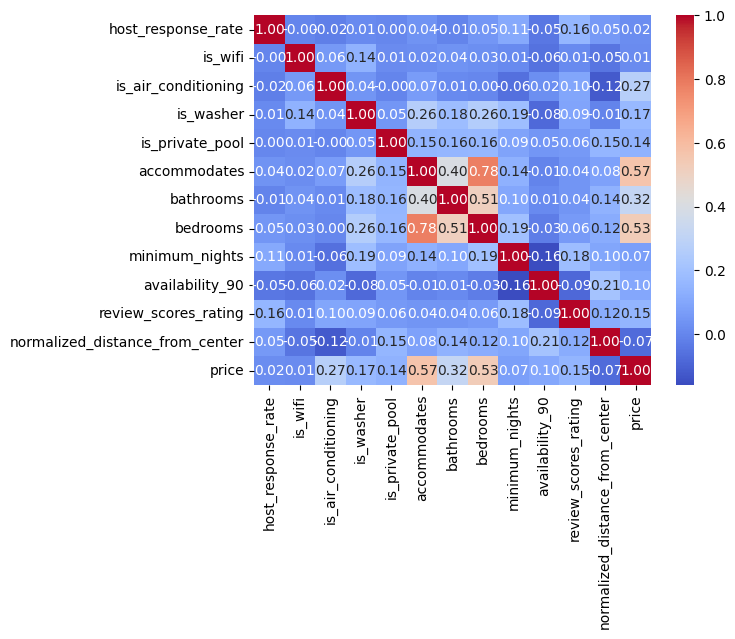

In [ ]:
# Heatmap plot
sns.heatmap(correlation_matrix, fmt=".2f", annot=True, cmap='coolwarm')
plt.show()

#7.Interpretation of the correlation coefficient.

**Correlation type:**

r > 0 positive correlation
– when the value of X increases, so does Y

r = 0 no correlation
– when X increases, Y sometimes increases and sometimes decreases

r < 0 negative correlation
– when X increases, Y decreases

**Correlation strength for |r|**

< 0.2 – no linear relationship

0.2 - 0.4 - weak relationship

0.4 -0.7 - moderate dependence

0.7 - 0.9 - quite a strong relationship

over 0.9 – very strong relationship